In this notebook, we explore the physical constraints on observer states in Observational Network Dynamics (OND). Specifically, we considered how limited visibility can affect the system.

Here are the visualizations:

1. **Network Node States Over Time**: This heatmap shows how the state of each node in the network evolves over time. It's similar to what we've seen before but serves as a baseline for comparison.

2. **Observer Node States Over Time**: This heatmap shows how the state of each observer node evolves. As before, the observer states tend to follow the node states.

3. **Partially Observed States Over Time**: This heatmap displays the partial observations made by each observer node, scaled by their individual visibility factors.

4. **Distribution of Visibility Factors**: This histogram illustrates the distribution of visibility factors, demonstrating the heterogeneity in observer capabilities in terms of how much of the state space they can see.

The notebook aims to show how even with limited visibility and observational constraints, the system still shows coherent behavior.


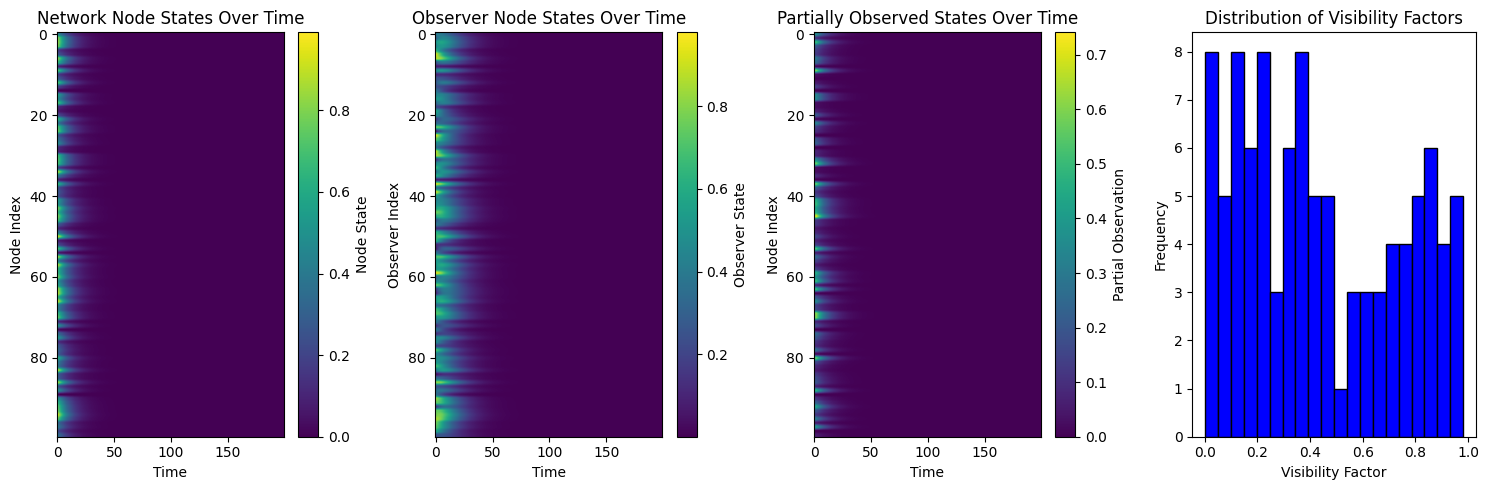

In [1]:
# Importing necessary libraries for simulation and visualization
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of nodes
T = 200  # Time steps
dt = 0.1  # Time step size

# Physical constraints on observer states
visibility_factor = np.random.rand(N)  # Fraction of the total state space that is visible to each observer

# Initialization
x = np.random.rand(N, T)  # States for all nodes
y = np.random.rand(N, T)  # States for observer nodes (for simplicity, each node is also an observer)
partial_obs = np.zeros((N, T))  # Partially observed states

# Function to update node and observer states considering physical constraints
def update_states(x, y, partial_obs, visibility_factor, t, dt):
    for i in range(N):
        dx = dt * (-x[i, t-1])  # For simplicity, dx/dt = -x (exponential decay)
        dy = dt * (x[i, t-1] - y[i, t-1])  # Observer state being pulled towards the node state
        partial_obs[i, t] = visibility_factor[i] * x[i, t-1]  # Partial observation based on visibility factor
        x[i, t] = x[i, t-1] + dx
        y[i, t] = y[i, t-1] + dy

# Simulation loop
for t in range(1, T):
    update_states(x, y, partial_obs, visibility_factor, t, dt)

# Visualization
plt.figure(figsize=(15, 5))

# Plot showing the current state of each node
plt.subplot(1, 4, 1)
plt.imshow(x, aspect='auto', cmap='viridis')
plt.title("Network Node States Over Time")
plt.xlabel("Time")
plt.ylabel("Node Index")
plt.colorbar(label="Node State")

# Plot showing the current state of each observer node
plt.subplot(1, 4, 2)
plt.imshow(y, aspect='auto', cmap='viridis')
plt.title("Observer Node States Over Time")
plt.xlabel("Time")
plt.ylabel("Observer Index")
plt.colorbar(label="Observer State")

# Plot showing the partially observed states
plt.subplot(1, 4, 3)
plt.imshow(partial_obs, aspect='auto', cmap='viridis')
plt.title("Partially Observed States Over Time")
plt.xlabel("Time")
plt.ylabel("Node Index")
plt.colorbar(label="Partial Observation")

# Histogram of visibility factors
plt.subplot(1, 4, 4)
plt.hist(visibility_factor, bins=20, color='blue', edgecolor='black')
plt.title("Distribution of Visibility Factors")
plt.xlabel("Visibility Factor")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
